The Simplest LSTM configuration is a Vanilla LSTM defined in 1997 LSTM paper. Vanilla LSTM architecture is capable of giving good results on most of the small sequence prediction problems.The Vanilla LSTM architecture is comprised of:

* Input Layer
* Fully Connected LSTM Layer
* Fully connected output layer

#### Echo Sequence Prediction Problem

The echo sequence prediction problem is for demonstrating memory capability of the vanilla LSTM. The task is like, given a sequence of random integers as input, to output the value of a random integer at a speciﬁc time input step that is not speciﬁed to the model.

For example, given the input sequence of random integers [5, 3, 2] and the chosen time step was the second value, then the expected output is 3

Technically, this is a sequence classiﬁcation problem; it is formulated as a many-to-one prediction problem, where there are multiple input time steps and one output time step at the end of the sequence.

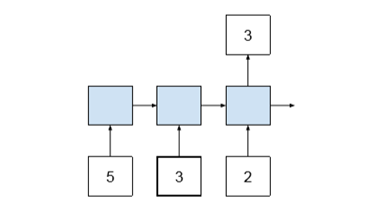

In [1]:
from IPython.display import Image
Image('C:/Users/Manoj/Desktop/Images/echo pred problem.png')

Steps for solving this problem are as:

* Generate Random Sequences
* One Hot Encode Sequences
* Worked Example
* Reshape Sequences

In [3]:
#import libraries
from random import randint
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
import warnings
warnings.filterwarnings('ignore')

In [4]:
#create a function to generate random sequences
from random import randint
def generate_sequences(length, n_features):
    return [randint(0, n_features-1) for i in range(length)]

In [5]:
#test
seq = generate_sequences(5, 10)
seq

[5, 8, 4, 5, 4]

In [6]:
#create a function for one hot encoding of sequence
def one_hot_encode(sequence, n_features):
    encoding = list()
    for val in sequence:
        vector = [0 for i in range(n_features)]
        vector[val] = 1
        encoding.append(vector)
    return np.array(encoding)

In [7]:
#test
encoded_seq = one_hot_encode(seq, 10)
encoded_seq

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

In [8]:
#create a function to decode the sequence back
def one_hot_decode(encoded_seq):
    return [np.argmax(vec) for vec in encoded_seq]

In [9]:
#test
one_hot_decode(encoded_seq)

[5, 8, 4, 5, 4]

In [10]:
#Generate one example sequence of random integers and reshape it to provide as input to LSTM 
#as [num_sample, num_time_steps, num_features]
def generate_example(length, n_features, out_index):
    #generate sequence of random integers
    sequence = generate_sequences(length, n_features)
    #encode sequence to one hot encoded sequence
    encoded = one_hot_encode(sequence, n_features)
    #reshape sequence into 3D sequence as applicable in case of LSTM as input
    X = encoded.reshape(1, length, n_features)
    #select output
    y = encoded[out_index].reshape(1, n_features)
    return X, y

In [17]:
#test the function
X, y = generate_example(5, 10, 2)
X

array([[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]]])

In [18]:
y

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [22]:
#looking back at original sequence
one_hot_decode(X.reshape(5,10))

[4, 7, 3, 4, 3]

#### Define and Compile vaniilla LSTM Model

In [23]:
#define model
length = 5
n_features = 10
out_index = 2
model = Sequential()
model.add(LSTM(25, input_shape=(length, n_features)))
model.add(Dense(n_features, activation = 'softmax'))

#compile model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 25)                3600      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                260       
Total params: 3,860
Trainable params: 3,860
Non-trainable params: 0
_________________________________________________________________
None


#### Fit Model

Let's train our model over 10000 random sequences 

In [24]:
#fit model
for i in range(10000):
    X,y = generate_example(length, n_features, out_index)
    model.fit(X, y, epochs=1, verbose=2)

Epoch 1/1
 - 1s - loss: 2.2576 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2050 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2595 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2810 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1659 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2879 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3868 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2675 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2964 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2216 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3472 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3027 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3300 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3530 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2842 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2483 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1819 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3218 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2933 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2932 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4662 -

Epoch 1/1
 - 0s - loss: 2.1536 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2440 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2651 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3039 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2750 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3305 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2746 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1799 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3303 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4665 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3228 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1962 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1729 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2651 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2916 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1733 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2603 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2859 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2213 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0778 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2816 - acc

Epoch 1/1
 - 0s - loss: 2.1796 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9205 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4683 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1160 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2823 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2019 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1694 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5082 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3373 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3222 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1732 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0161 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1825 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1480 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0823 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9751 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7690 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4240 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3099 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1609 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1786 - acc: 0.0000

Epoch 1/1
 - 0s - loss: 1.8182 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0980 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8867 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2072 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4266 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0391 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2330 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5522 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9980 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9503 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2894 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1366 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2349 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7131 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9281 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1448 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0284 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2392 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1107 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4944 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2182 - acc: 0.0000

Epoch 1/1
 - 0s - loss: 1.7788 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3887 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0487 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2693 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2273 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0032 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0116 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9510 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1027 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8889 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6280 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3033 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2380 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9487 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3169 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0452 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4675 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2594 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6235 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1437 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2487 -

Epoch 1/1
 - 0s - loss: 2.1741 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4192 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8113 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0581 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5248 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8355 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6538 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1014 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9453 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7509 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7372 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8759 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2678 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2469 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7435 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4284 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0248 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9404 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9477 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.6732 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2187 - acc: 0.

Epoch 1/1
 - 0s - loss: 1.9425 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6415 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4703 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1114 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3732 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8470 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7604 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.5433 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1454 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3718 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5228 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3107 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9827 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.6412 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0553 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3490 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3934 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9052 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7153 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9037 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8333 - acc: 1.0000
Epoch 1/1
 

Epoch 1/1
 - 0s - loss: 0.6062 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2423 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5405 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.7189 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2871 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1586 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4261 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4493 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5471 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4742 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8287 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3057 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3226 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0792 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5624 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4216 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0441 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6805 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6610 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5760 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7584 - acc: 1.0000
Epoch 1/1
 - 0s

Epoch 1/1
 - 0s - loss: 2.1036 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2727 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8182 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4007 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7344 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5867 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9697 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4426 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9643 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1714 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3071 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8700 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.6252 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2023 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0752 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0422 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6028 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9543 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1648 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0079 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.7467 - acc: 0.0000e+00
Epoch 1

Epoch 1/1
 - 0s - loss: 1.6083 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4314 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9589 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2798 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7557 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6610 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6224 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.6456 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9520 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8459 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8523 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6930 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3334 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7978 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7116 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.9040 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6322 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1461 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6760 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3827 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1604 - acc: 0.0000e+00

Epoch 1/1
 - 0s - loss: 0.3027 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8154 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1813 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6118 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3765 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8791 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3431 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3534 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5272 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3553 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5735 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9920 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1395 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8784 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5706 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2153 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3802 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5764 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3706 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2386 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4485 - acc: 0.0000e+00
Epoch 1/1
 

Epoch 1/1
 - 0s - loss: 0.8661 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4609 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7372 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4300 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7716 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8798 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2428 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 4.6693 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4078 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7205 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.7004 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5450 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3669 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1056 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5893 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0096 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6567 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5635 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.3022 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0920 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0696 - acc: 0.0000e+00
Epoch 1

Epoch 1/1
 - 0s - loss: 2.6692 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4068 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7948 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3681 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0928 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8761 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7139 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3433 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7432 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.9402 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9379 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3117 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5381 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2075 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0156 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7741 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8156 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1593 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9991 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6410 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5174 - acc: 0.0000

Epoch 1/1
 - 0s - loss: 1.5703 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3522 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2874 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7889 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.7450 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9710 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9873 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8768 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4071 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7893 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6564 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3427 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9929 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5610 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7791 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0742 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3747 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2803 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0028 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9943 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1615 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss:

Epoch 1/1
 - 0s - loss: 0.1392 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2665 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4465 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7881 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2948 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8289 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4038 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3212 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9989 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7731 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2442 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6196 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8055 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6524 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1685 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1867 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3706 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8243 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6038 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2999 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5417 - acc: 1.0000
Epoch 1/1
 

Epoch 1/1
 - 0s - loss: 2.7429 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6308 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7924 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5363 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4339 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8371 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7248 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6260 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1150 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9838 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8536 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7292 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7847 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1944 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1773 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8066 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0091 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7447 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2351 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8452 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6615 - acc: 0.0000e+00
Epo

Epoch 1/1
 - 0s - loss: 0.6097 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3657 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1118 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5700 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9741 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1138 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8490 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3164 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0587 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1508 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1257 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5230 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4821 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1131 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4285 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0400 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7095 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9460 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5043 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2338 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4338 - acc: 1.0000
Epoch 1/1
 - 0s - loss:

Epoch 1/1
 - 0s - loss: 0.1742 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5088 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4139 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5879 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2613 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4563 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5734 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2938 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1677 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6217 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3781 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5077 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4697 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2510 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3783 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2039 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6242 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9217 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7849 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6450 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4679 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4

Epoch 1/1
 - 0s - loss: 0.9059 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1892 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5583 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4272 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0913 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4163 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9424 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3802 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0637 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7437 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1025 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7822 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6921 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4516 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0544 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2827 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1051 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4483 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1078 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7593 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3159 - acc: 0.0000e+00
Epoch 1/1
 

Epoch 1/1
 - 0s - loss: 1.1248 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8179 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8070 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2988 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5918 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2896 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5025 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7734 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1869 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9053 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8272 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8201 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6341 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6419 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2200 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1077 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.5068 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7490 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4642 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9244 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9051 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4289 

Epoch 1/1
 - 0s - loss: 2.4203 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2503 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5545 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1346 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6683 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9144 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9313 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4221 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6761 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1175 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0706 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4388 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5122 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5080 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5079 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2700 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4926 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1217 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1474 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2635 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0534 - acc: 0.0000e+00
Epo

Epoch 1/1
 - 0s - loss: 0.5615 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8541 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1173 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5482 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7075 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5872 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6717 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3716 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3505 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8254 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1008 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5122 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2441 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8258 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4758 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7324 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3452 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4001 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8133 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0445 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8245 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1295 

Epoch 1/1
 - 0s - loss: 0.9146 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9901 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2817 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0735 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4339 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0569 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1891 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2632 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4176 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8863 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5001 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2476 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7098 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2413 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7618 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7814 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0301 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8455 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0958 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3405 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8017 - acc: 1.0000
Epoch 1/1
 - 0s

 - 0s - loss: 0.6320 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6680 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1746 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5427 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3852 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0269 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6959 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4600 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2429 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1707 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6777 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2819 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5533 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3892 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6361 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3725 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6803 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2395 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7283 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6218 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0868 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3989 - acc: 1.0000
Epoc

Epoch 1/1
 - 0s - loss: 1.4140 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2391 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8497 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1489 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2615 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5111 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0774 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1622 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1039 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1867 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7241 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4682 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8159 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5594 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1492 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1176 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2279 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2261 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8406 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9503 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1076 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3661 - acc: 0.000

Epoch 1/1
 - 0s - loss: 0.9346 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4161 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2860 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1562 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1290 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0594 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6516 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2019 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6224 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8455 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6021 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1823 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0576 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2147 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5206 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9406 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0256 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2155 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2864 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0163 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4726 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0694 - ac

Epoch 1/1
 - 0s - loss: 1.0748 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1409 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1120 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8383 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1910 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8992 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8323 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1256 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1435 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4566 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1304 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1969 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2414 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4112 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7063 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1766 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8138 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1828 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4277 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1073 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7842 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1276 - ac

Epoch 1/1
 - 0s - loss: 2.0737 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3354 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4432 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7854 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8335 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5117 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9100 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3815 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1084 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3793 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4660 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5882 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0883 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8319 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3836 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7756 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4484 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0810 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0043 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1910 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5214 - acc: 1.0000
Epoch 1/1
 - 0s - loss:

Epoch 1/1
 - 0s - loss: 0.4616 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7291 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1751 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4076 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0673 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1385 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5541 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7343 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4333 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0587 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2478 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7457 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0377 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5170 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4740 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8805 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3942 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0177 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2765 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6695 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3223 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8930 - acc: 0

Epoch 1/1
 - 0s - loss: 0.4303 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7455 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4166 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6540 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5213 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6941 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0009 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4937 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0534 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7768 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1531 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9694 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8964 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0476 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3003 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8621 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0271 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6720 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7760 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1768 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8844 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2216 - ac

Epoch 1/1
 - 0s - loss: 0.4632 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0269 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0946 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1089 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0394 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1314 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4065 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4446 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2181 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4380 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1408 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9953 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3455 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4084 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3086 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1222 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0535 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6150 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4334 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4375 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4680 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9351 - acc: 0

Epoch 1/1
 - 0s - loss: 0.3693 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4851 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2874 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2622 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0270 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6436 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1726 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3753 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0992 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7357 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4097 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1205 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4399 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3032 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1369 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8641 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3026 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0494 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1690 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1088 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8044 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2711 - acc: 1.000

Epoch 1/1
 - 0s - loss: 0.2501 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3069 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5306 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0543 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1116 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1794 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8910 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3565 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7611 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9031 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1342 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0535 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4324 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6559 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1306 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3390 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2560 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1514 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5615 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5601 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4191 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2843 - acc: 1.000

Epoch 1/1
 - 0s - loss: 0.8369 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0281 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8775 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0467 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0082 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8987 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2394 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2178 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3953 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1320 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4080 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6684 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1131 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0549 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5338 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0507 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9848 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0210 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0546 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4557 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1718 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6623 - acc: 1

Epoch 1/1
 - 0s - loss: 0.1465 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5135 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7309 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2324 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0277 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1938 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1603 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6878 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2028 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0157 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5239 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3115 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8846 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3824 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1686 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3880 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8248 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0196 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0899 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0170 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0851 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6907 - acc: 1.000

Epoch 1/1
 - 0s - loss: 0.2363 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6480 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3913 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1232 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0179 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1385 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5110 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3254 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3323 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3843 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9061 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5625 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2596 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0344 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7024 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0478 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0590 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2644 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0769 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3731 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1616 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1410 - acc: 1.0000
Epoch 

Epoch 1/1
 - 0s - loss: 0.1227 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0553 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5731 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0606 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4056 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3003 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1279 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8703 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3261 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2919 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8596 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0811 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4942 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3793 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0110 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1822 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2823 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3851 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0399 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1298 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3985 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2847 - acc: 1.000

Epoch 1/1
 - 0s - loss: 0.1565 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1203 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4594 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9182 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9214 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2441 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1394 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2394 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0476 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0643 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3578 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2718 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4509 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0909 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2021 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4435 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1747 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7811 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7091 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8485 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1521 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3652 - acc: 1.000

Epoch 1/1
 - 0s - loss: 0.1422 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3173 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3875 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6863 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2108 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5458 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1717 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9869 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0266 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0518 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1373 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0138 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2044 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1108 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5957 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7078 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3248 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3702 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3178 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2439 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0258 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0401 - acc: 1

Epoch 1/1
 - 0s - loss: 0.1289 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0715 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7858 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1897 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5447 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1357 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4194 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1987 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0133 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1252 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4736 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0437 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1931 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2400 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1548 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0248 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0385 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0065 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3815 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3096 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7946 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0406 - acc: 1.0000
Epoch 

Epoch 1/1
 - 0s - loss: 0.0278 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2113 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3149 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4735 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0184 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1521 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2536 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7430 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1709 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5011 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3557 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1990 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1659 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7237 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1469 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0540 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0491 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3625 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0279 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0782 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1637 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2439 - acc: 1.000

Epoch 1/1
 - 0s - loss: 0.0392 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3840 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0291 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0759 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7426 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2270 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9874 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8479 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0862 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1522 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5512 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0968 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1027 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0806 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4068 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8291 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5559 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4175 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2404 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0119 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8412 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1576 - acc: 1

Epoch 1/1
 - 0s - loss: 0.3548 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0764 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1057 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0600 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2462 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2826 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2778 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2297 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9141 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6216 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8025 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2823 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7093 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3475 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2431 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3851 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0917 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0340 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6586 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0310 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0583 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1998 - acc: 1.0000
Ep

Epoch 1/1
 - 0s - loss: 0.4428 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0204 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0286 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0386 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1646 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0562 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0885 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9161 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1354 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6708 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8179 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0419 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1194 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4536 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0190 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1970 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1481 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6974 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0453 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2544 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0583 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2104 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.1960 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5020 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0517 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0067 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0050 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0129 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4527 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3305 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0491 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0089 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3137 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0141 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3384 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0180 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2714 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1352 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3203 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0780 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2737 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5119 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0391 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2029 - acc: 1.0000
Epoch 

Epoch 1/1
 - 0s - loss: 0.2391 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0040 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1668 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0501 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6485 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0200 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1922 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0100 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1767 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6619 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1769 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0092 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3817 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0949 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0030 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1566 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1808 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0109 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2697 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3590 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2369 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2072 - acc: 1.0000
Epoch 

Epoch 1/1
 - 0s - loss: 0.1602 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4963 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1541 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3940 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4188 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1415 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0839 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3695 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0183 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5437 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0310 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8233 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0979 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1899 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7156 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0629 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3297 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0221 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3220 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0093 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0567 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1095 - acc: 1.000

Epoch 1/1
 - 0s - loss: 0.3830 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0282 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0273 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0724 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2650 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0314 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0880 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1842 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0200 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3000 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0141 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2181 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0137 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0672 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6980 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2501 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0491 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3917 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4798 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0429 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2385 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1922 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.1061 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2086 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2006 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3960 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0454 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0060 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0369 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7021 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0184 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0336 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2283 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0609 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0477 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1771 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0242 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0644 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2546 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0958 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2109 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1634 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0543 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1621 - acc: 1.0000
Ep

Epoch 1/1
 - 0s - loss: 0.3710 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4778 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0129 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4520 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0218 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4399 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1190 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1489 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0866 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0406 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0667 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0328 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0579 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6591 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0202 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1300 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3801 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0356 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1554 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5399 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1897 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0445 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.0519 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2764 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2181 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1553 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0877 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4101 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0049 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0508 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1266 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0239 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1339 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5585 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0537 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0095 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0283 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0334 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0050 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0105 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0125 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0873 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0048 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0200 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.0505 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2111 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1073 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0072 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1237 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1997 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1818 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0110 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3721 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0176 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0374 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0844 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0042 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1473 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0932 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2975 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1579 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0019 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0868 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0557 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0075 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0282 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.0443 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0069 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1990 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2604 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0099 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0215 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0021 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5078 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0999 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0060 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0793 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0062 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0475 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0535 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0369 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1231 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0448 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0193 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1157 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0060 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1300 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0104 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.0084 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0046 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0283 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0190 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0261 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0554 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0804 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1275 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0992 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2068 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0053 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0732 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0498 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0103 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0489 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1008 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0250 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0292 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6875 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2852 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0270 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6816 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.0759 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0626 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0899 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1547 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4560 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0147 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1069 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6394 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0204 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0109 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1572 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0388 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0636 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0594 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0472 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0177 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0871 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0192 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0066 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0044 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0204 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0013 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.0409 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0115 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1006 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0039 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0777 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1128 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0179 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1664 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0059 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0424 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0331 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0390 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0031 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2551 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0294 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0073 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0681 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0341 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0390 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0043 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0690 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1010 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.4974 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1352 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3600 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0374 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0352 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0225 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1889 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1576 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0792 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3422 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0561 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0192 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0113 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0493 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1046 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0236 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0825 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0017 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0280 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0034 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0696 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0846 - acc: 1.0000
Epoch 1/1


#### Evaluate Model

Let's evaluate model performance over 100 random sequences and print out accuracy

In [27]:
correct = 0
for i in range(100):
    X,y = generate_example(length, n_features, out_index)
    yhat = model.predict(X)
    if one_hot_decode(yhat) == one_hot_decode(y):
        correct += 1
print('Accuracy: %f' % ((correct/100)*100.0))

Accuracy: 99.000000


#### Make a Prediction over a new sequence

In [28]:
X, y = generate_example(length, n_features, out_index)
yhat = model.predict(X)
print('Sequence: %s' % [one_hot_decode(x) for x in X])
print('Expected: %s' % one_hot_decode(y))
print('Predicted: %s' % one_hot_decode(yhat))

Sequence: [[8, 2, 6, 7, 5]]
Expected: [6]
Predicted: [6]


#### Conclusion

This LSTM architecture is demonstrating the memory capability of LSTM memory cell. The model is trained over random sequences as input and integer at index 2 as output (y). Model is expected to learn the output integer at index 2 and predict it accurately given a new sequence.